In [14]:
from commons.DataLoader import download_data
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Pobieranie danych

In [2]:
download_data('http://bit.ly/train_road_sign', "lab3/data/train.p")

/home/pz/Documents/projects/statystyka/commons/DataLoader.py:11: UserWarning: File train.p on lab3/data/train.p path is already exist.
  warn(f'File {file_name} on {target_path} path is already exist.')


In [3]:
download_data('http://bit.ly/test_road_sign', "lab3/data/test.p")

/home/pz/Documents/projects/statystyka/commons/DataLoader.py:11: UserWarning: File test.p on lab3/data/test.p path is already exist.
  warn(f'File {file_name} on {target_path} path is already exist.')


In [4]:
download_data('http://bit.ly/dw_signnames', "lab3/data/signnames.csv")

/home/pz/Documents/projects/statystyka/commons/DataLoader.py:11: UserWarning: File signnames.csv on lab3/data/signnames.csv path is already exist.
  warn(f'File {file_name} on {target_path} path is already exist.')


In [5]:
train = pd.read_pickle('lab3/data/train.p')
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [6]:
X_train, y_train = train['features'], train['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

In [9]:
signnames_df = pd.read_csv('lab3/data/signnames.csv')
signnames_df.sample(5)

,a,b
14,14,Stop
2,2,Speed limit (50km/h)
5,5,Speed limit (80km/h)
31,31,Wild animals crossing
13,13,Yield


In [11]:
id_to_name = signnames_df.to_dict()['b']
len(id_to_name)

43

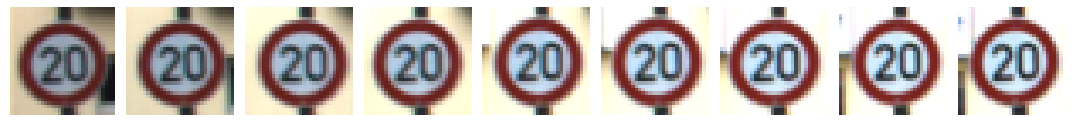

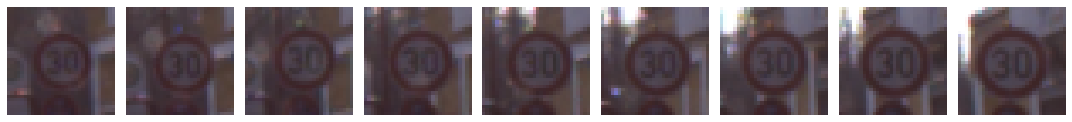

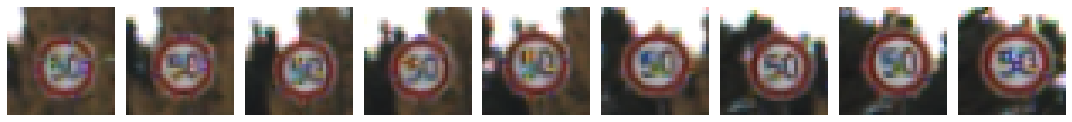

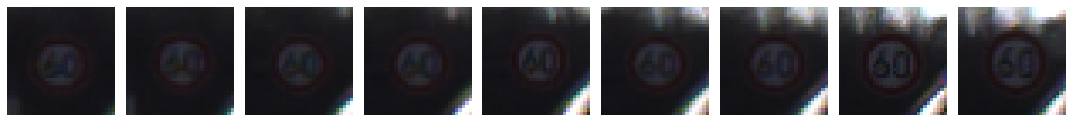

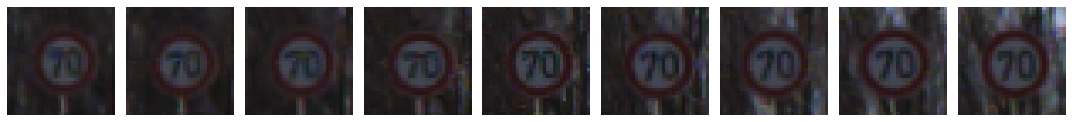

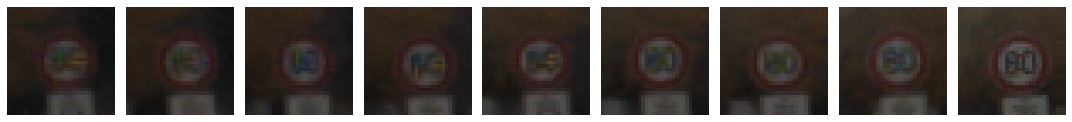

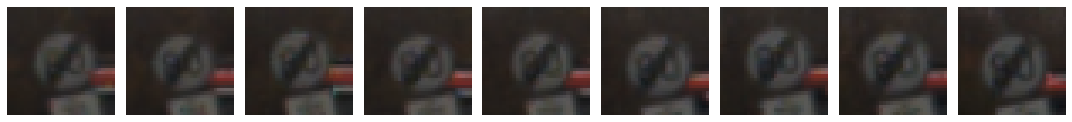

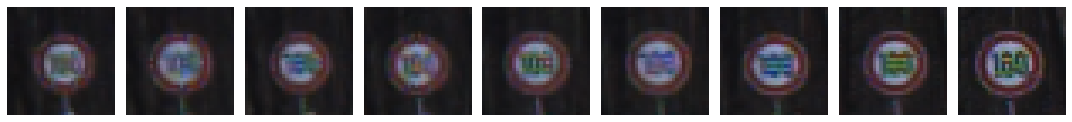

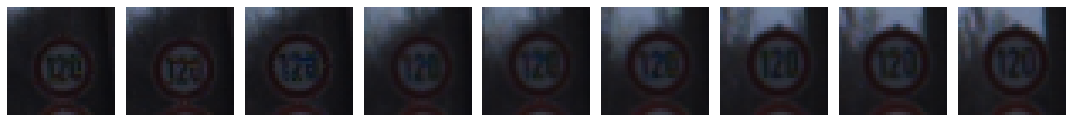

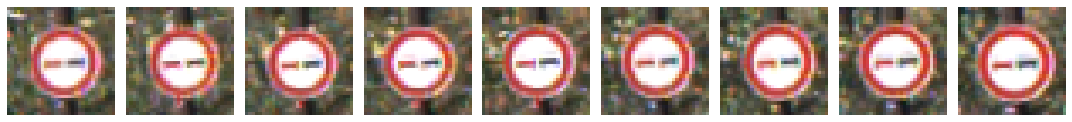

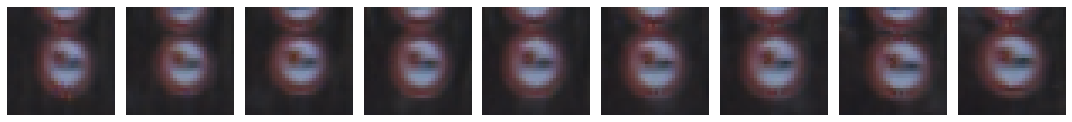

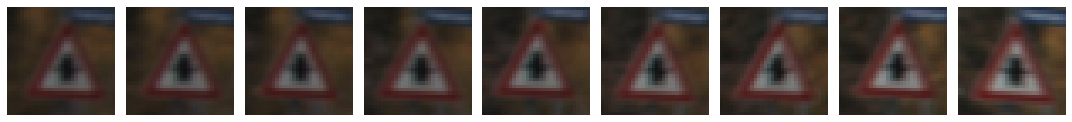

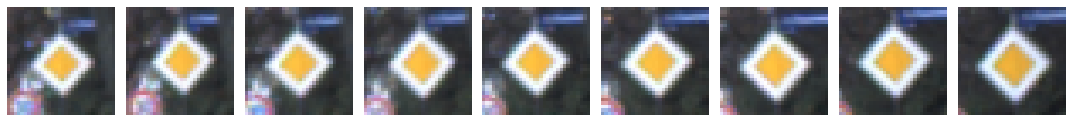

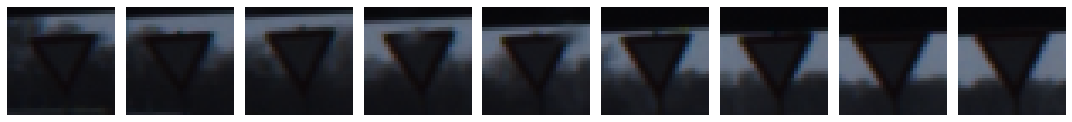

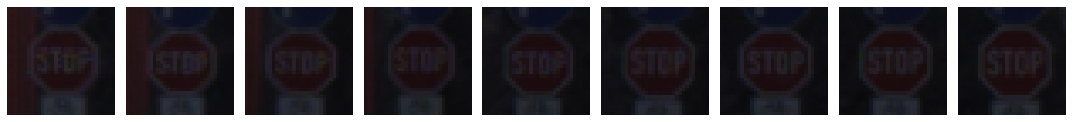

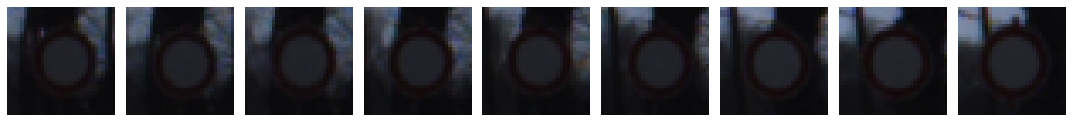

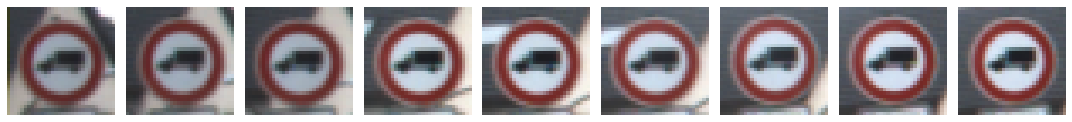

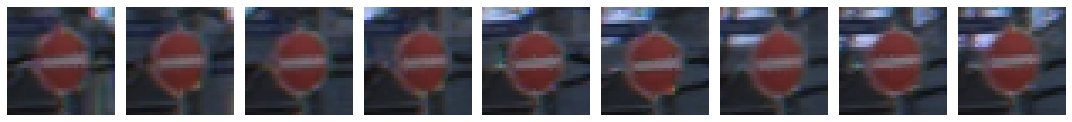

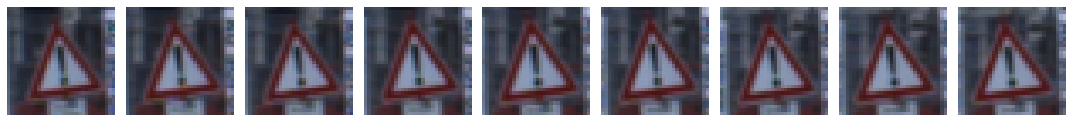

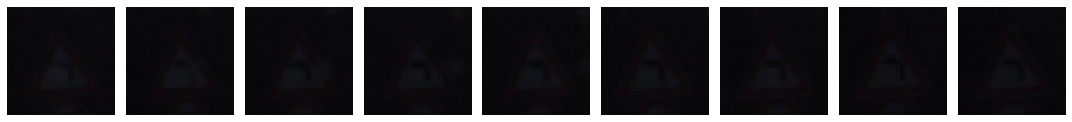

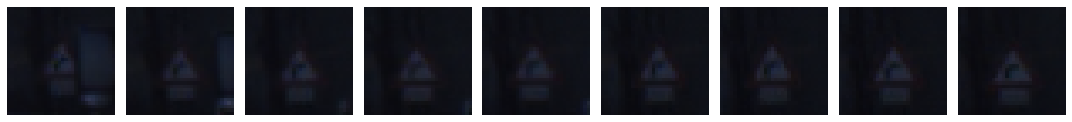

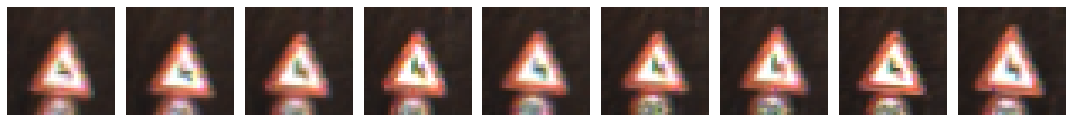

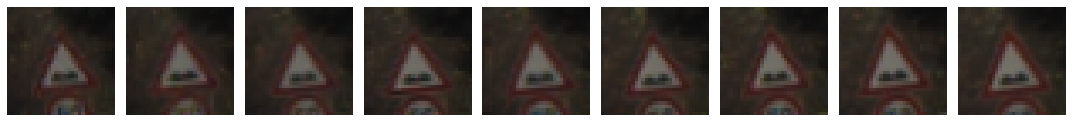

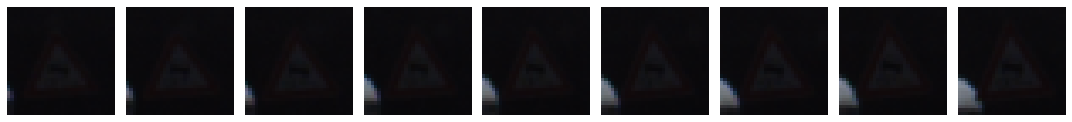

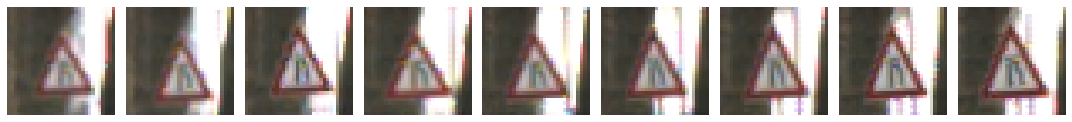

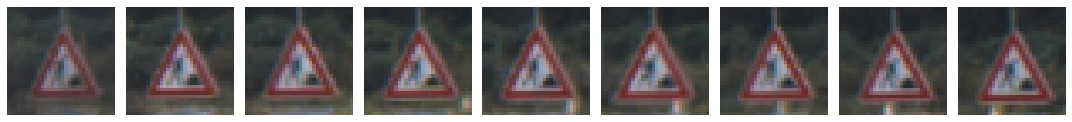

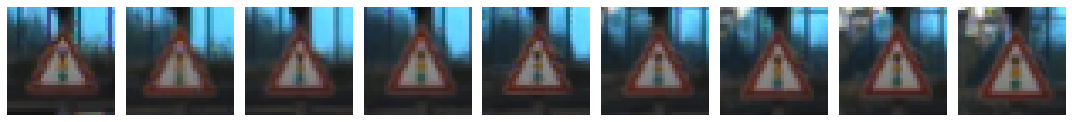

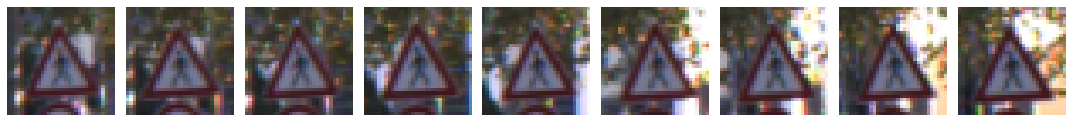

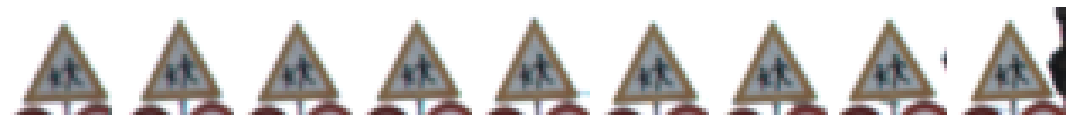

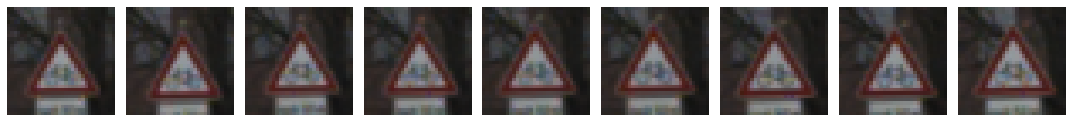

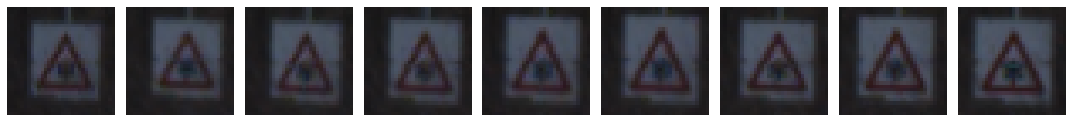

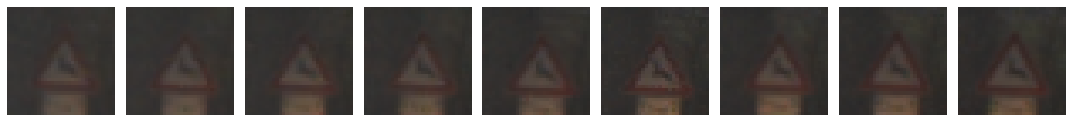

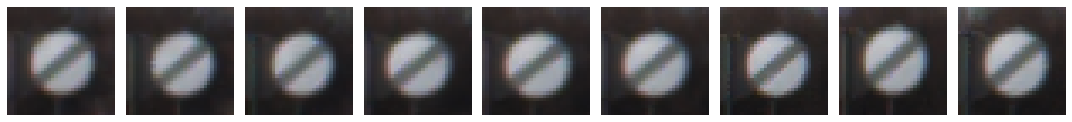

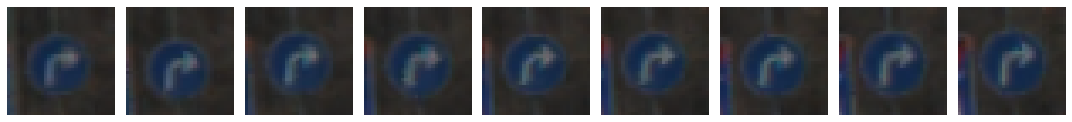

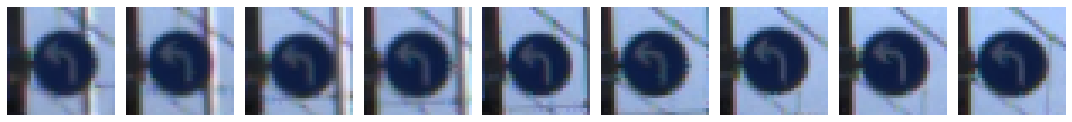

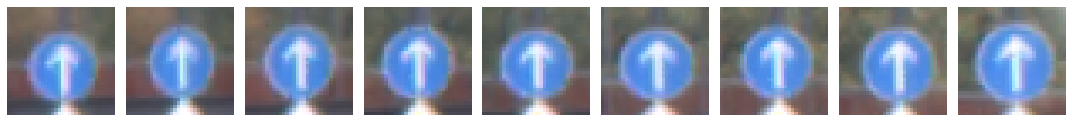

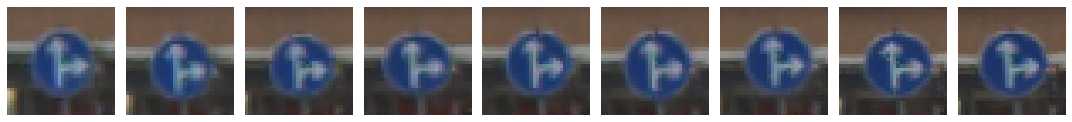

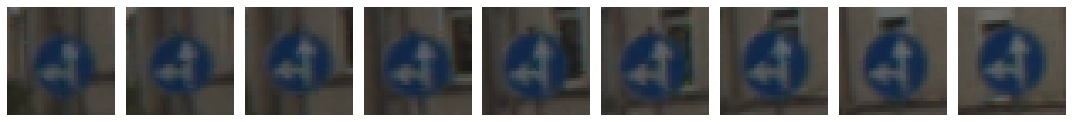

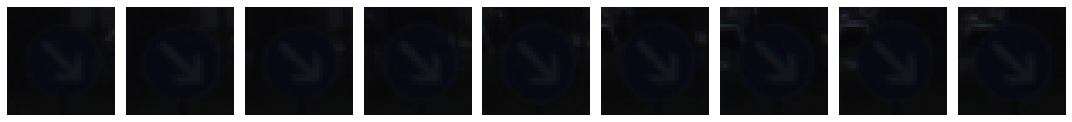

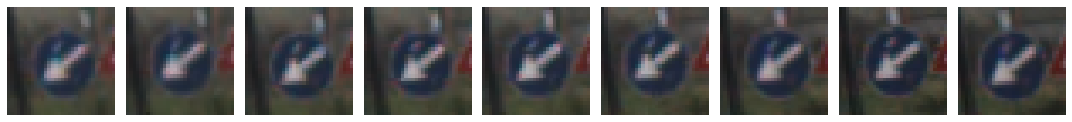

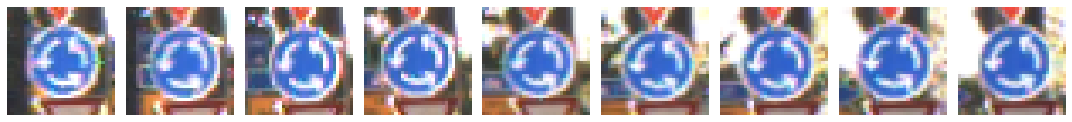

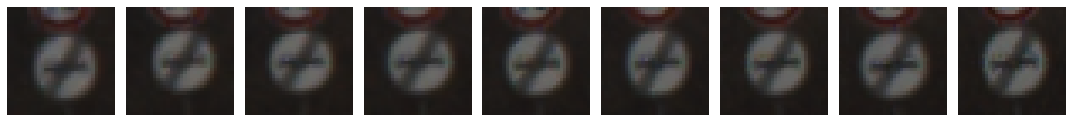

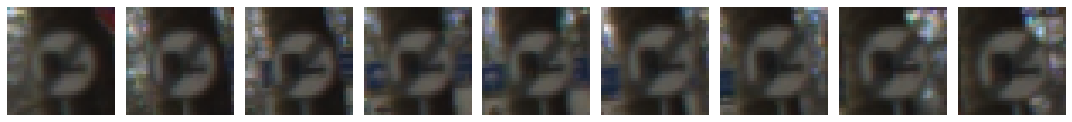

In [13]:
for sign_id in id_to_name:
    signs = X_train[y_train == sign_id]
    plt.figure(figsize=(15, 5))
    for idx in range(min(9, len(signs))):
        plt.subplot(f'19{(idx + 1)}')
        plt.imshow(signs[idx])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

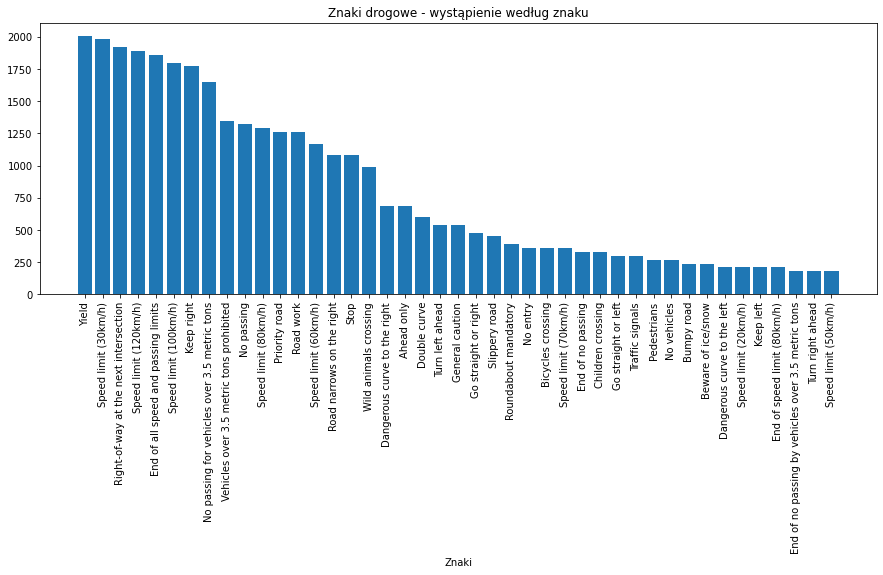

In [39]:
counted = Counter(y_train).most_common()
id_labels, cnt_labels = zip(*counted)
ids = range(len(id_labels))
plt.figure(figsize=(15, 5))
plt.bar(ids, cnt_labels)

plt.xlabel('Znaki')
labels = [id_to_name[id_labels[id_]] for id_ in id_labels]
plt.xticks(ids, labels, rotation='vertical')
plt.title('Znaki drogowe - wystąpienie według znaku')
plt.show()